# Exploratory Data Analysis on diabetes prediction dataset

Data Dictionary 

| Field               | Description                                               | Values                                                                                     |
|---------------------|-----------------------------------------------------------|--------------------------------------------------------------------------------------------|
| gender              | Biological sex of individual.                             | male, female, other                                                                        |
| age                 | Age of individual.                                       | 0-80                                                                                       |
| hypertension        | History of hypertension of individual.                    | 1 (yes), 0 (no)                                                                            |
| heart_disease       | History of heart disease of individual.                   | 1 (yes), 0 (no)                                                                            |
| smoking_history      | History of smoking of individual.                          | Not current, former, No Info, current, never and ever                                     |
| bmi                 | Measure of body fat based on weight and height.           | 10.16-71.55                                                                                |
| HbA1c_level        | Average blood sugar of individual in the past 2-3 months. | 3.5-9 (where >6.5% is indicative of diabetes)                                            |
| blood_glucose_level | Amount of glucose in bloodstream at given time.           | 80-300                                                                                     |
| diabetes            | Presence of diabetes.                                     | 1 (yes), 0 (no)                                                                            |


In [1]:
# Import data processing packages
import pandas as pd
import numpy as np 

# Import data exploration and analysis packages 
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Reading the dataset
df = pd.read_csv('../input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Exploratory Data Analysis

#### Descriptive Statistics

In [4]:
print("Shape:")
print(df.shape)

print("\nInfo:")
print(df.info())
      
print("\nDescriptive Stats:")
print(df.describe())

Shape:
(100000, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

Descriptive Stats:
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22

In [5]:
# Missing Values 
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

From initial exploration, the dataset consists of 100,000 records and 9 variables. 
No missing values present in columns.

The variables can be described as:
- numerical_features: ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
- binary_categorical_features: ['hypertension', 'heart_disease']
- nominal_features: ['gender', 'smoking_history']
- target = 'diabetes'

### BMI Categorisation
With reference to Wikipedia, the Body Mass Index (BMI) is calculated by dividing a person's weight by their height (kg/m²).<br>
BMI Prime is the relative measure of an individual's weight compared to the healthy weight range of one's height (this is based on the upper limit). <br>
For the purpose of EDA, we will explore BMI as both numerical and categorical variable.


| Category                        | BMI (kg/m²)        | BMI Prime       |
|---------------------------------|---------------------|------------------|
| Underweight (Severe thinness)   | < 16.0              | < 0.64          |
| Underweight (Moderate thinness) | 16.0 – 16.9         | 0.64 – 0.67     |
| Underweight (Mild thinness)     | 17.0 – 18.4         | 0.68 – 0.73     |
| Normal range                    | 18.5 – 24.9         | 0.74 – 0.99     |
| Overweight (Pre-obese)         | 25.0 – 29.9         | 1.00 – 1.19     |
| Obese (Class I)                | 30.0 – 34.9         | 1.20 – 1.39     |
| Obese (Class II)               | 35.0 – 39.9         | 1.40 – 1.59     |
| Obese (Class III)              | ≥ 40.0              | ≥ 1.60          |


In [6]:
# define bins for BMI based on classification 
bins = [-float('inf'), 16.0, 16.9, 18.4, 24.9, 29.9, 34.9, 39.9, float('inf')]
labels = [
    'Underweight_H', 
    'Underweight_M', 
    'Underweight_L', 
    'Normal range', 
    'Overweight', 
    'Obese_L', 
    'Obese_M', 
    'Obese_H'
]

bmi_df = df.copy()
bmi_df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)
bmi_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_category
0,Female,80.0,0,1,never,25.19,6.6,140,0,Overweight
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Overweight
2,Male,28.0,0,0,never,27.32,5.7,158,0,Overweight
3,Female,36.0,0,0,current,23.45,5.0,155,0,Normal range
4,Male,76.0,1,1,current,20.14,4.8,155,0,Normal range
...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0,Overweight
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0,Underweight_L
99997,Male,66.0,0,0,former,27.83,5.7,155,0,Overweight
99998,Female,24.0,0,0,never,35.42,4.0,100,0,Obese_M


#### Target Distribution

<Axes: xlabel='diabetes'>

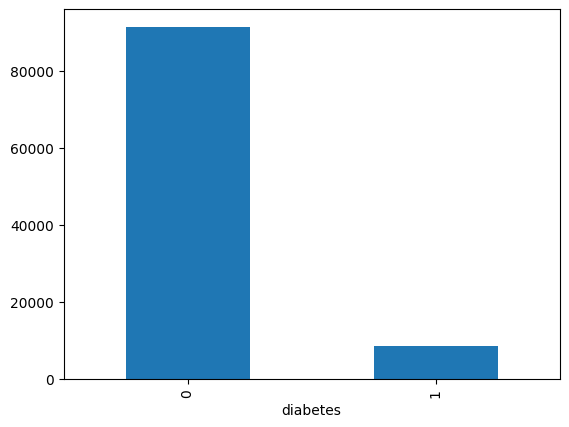

In [7]:
df["diabetes"].value_counts().plot.bar()

The target distribution is severely imbalanced, and may present inaccuracies and overfitting when building the model. 
In order to balance the dataset, these balancing techniques will be considered based on the datatset:
1. Synthetic Minority Oversampling Technique (SMOTE) 
2. Random Under Sampling 
3. Random Over Sampling

#### Numerical Features Distribution and Relation to Diabetes

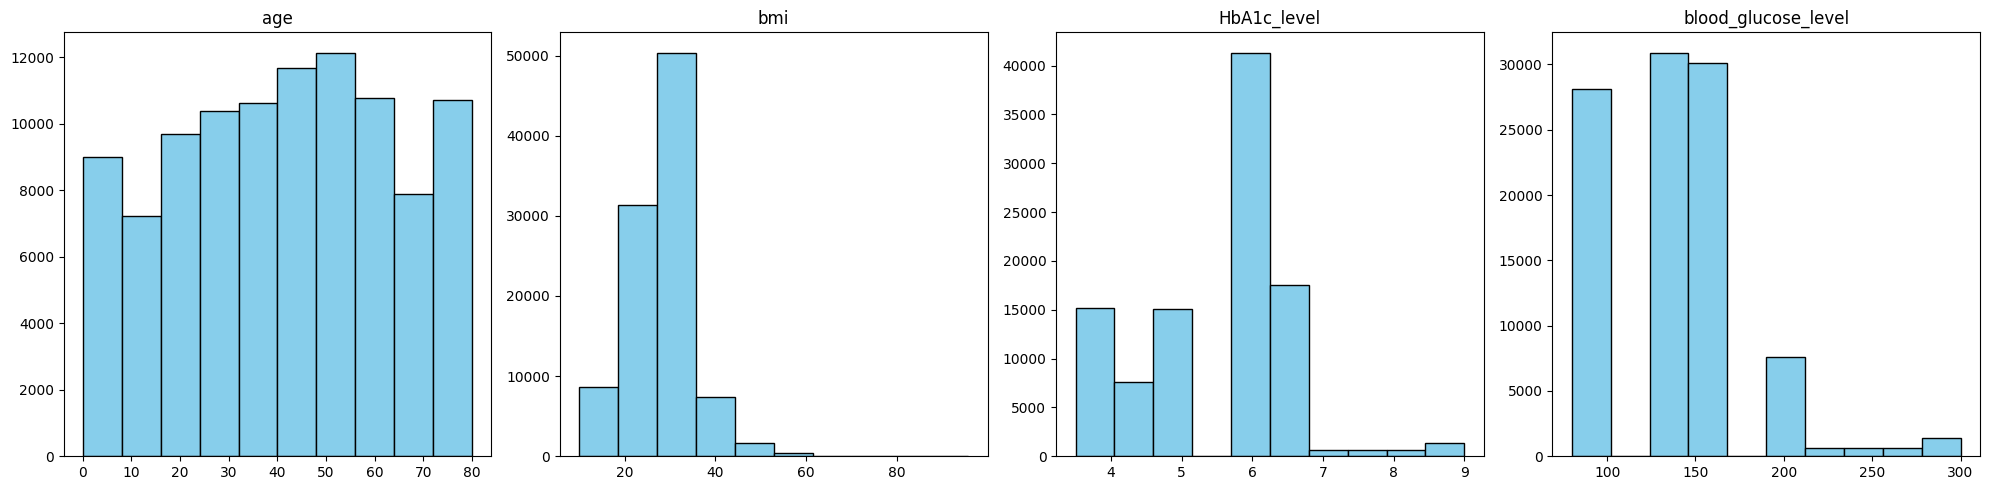

In [8]:
# Extract numerical features
num_features = df[["age", "bmi", "HbA1c_level", "blood_glucose_level"]]

# Plot distribution
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
for i, column in enumerate(num_features.columns):
    axes[i].hist(num_features[column], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(column)

# Show plot
plt.tight_layout() 
plt.show()

Based on the distribution, it is observed that:
1. The age distribution is rather equal amongs all age range, with the most popular age group being 50-60. 
2. Majority of the individuals have a BMI that lies within 30-40, of obsese class 1.
3. The HbA1c_level distribution shows most individuals have a HbA1c_level of 5.6-6.2. 
4. Most individuals have a blood glucose level of 125 - 175.

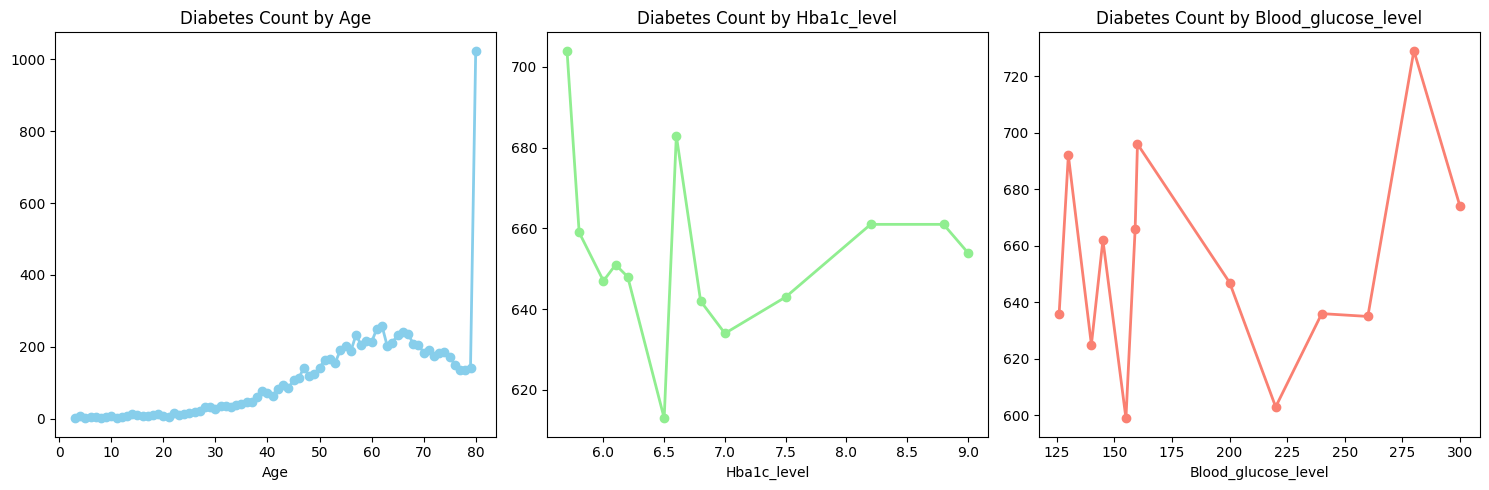

In [9]:
# Create function to plot the relationship between age, HbA1c_level, blood_glucose_level, and diabetes
def plot_graph_numerical(df, cols):
    fig, axs = plt.subplots(1, len(cols), figsize=(5 * len(cols), 5))  # Adjust size based on number of columns

    for i, col in enumerate(cols):
        diabetes_count = df[df['diabetes'] == 1].groupby(col).size()  
        axs[i].plot(diabetes_count.index, diabetes_count.values, marker='o', color=colors[i], linewidth=2)
        axs[i].set_title(f'Diabetes Count by {col.capitalize()}')
        axs[i].set_xlabel(col.capitalize())

    plt.tight_layout()
    plt.show()
    
colors = ["skyblue", "lightgreen", "salmon"]
numerical_cols = ["age", "HbA1c_level", "blood_glucose_level"]

# Plot graph
plot_graph_numerical(df, numerical_cols)


Based on the relationship with diabetes, we observed that 
1. The older the individuals are, the probability of having diabetes increases. Elderly individuals, particularly at age 80, are more likely to have diabetes.
2. Individuals with Hba1c_levels > 5.5 are more likely to have diabetes. 
3. Individuals with blood_glucose_level > 125 are more likely to have diabetes. 

#### Categorical Distribution

/tmp/ipykernel_30/2478452616.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes_count = df.groupby(col).diabetes.sum()


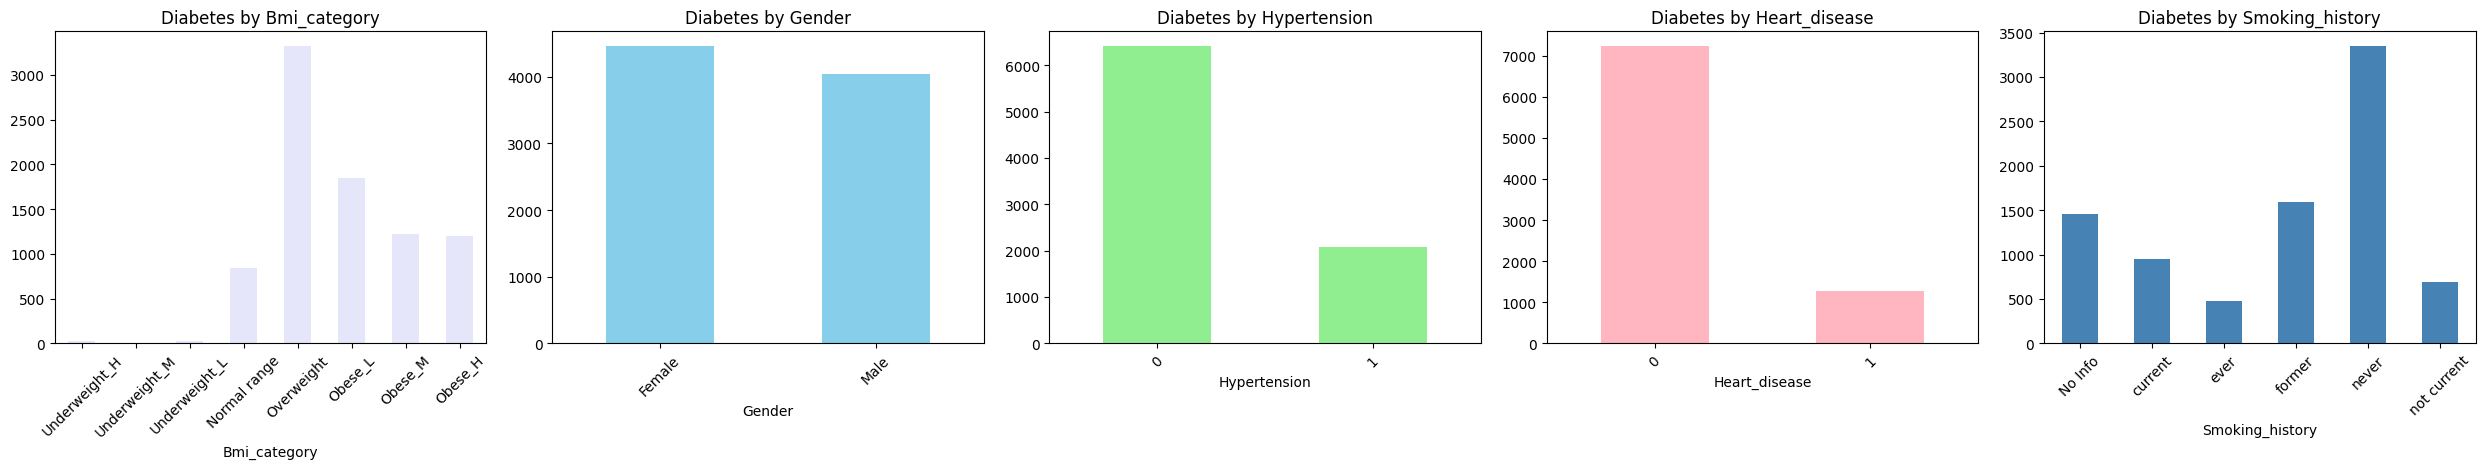

In [10]:
# Create function to plot the relationship between bmi, gender, hypertension, heart disease, smoking history and diabetes
def plot_graph_categorical(df, cols):
    df = df[df["diabetes"] == 1]
    fig, axs = plt.subplots(nrows=1, ncols=len(cols), figsize=(5 * len(cols), 5))

    for i, col in enumerate(cols):
        # Group by the column and sum the diabetes counts
        diabetes_count = df.groupby(col).diabetes.sum()
        diabetes_count.plot(kind='bar', ax=axs[i], color=colors[i])  
        axs[i].set_title(f'Diabetes by {col.capitalize()}')
        axs[i].set_xlabel(col.capitalize())
        axs[i].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0, 1, 0.96]) 
    plt.show()

colors = ["lavender", "skyblue", "lightgreen", "lightpink", "steelblue"]
cols_to_plot = ["bmi_category", "gender", "hypertension", "heart_disease", "smoking_history"]

# Plot graph
plot_graph_categorical(bmi_df, cols_to_plot)

Based on the relationship with diabetes, we observed that 
1. Individuals with overweight and obese BMI classes are more likely to have diabetes.
2. In this dataset, there are slightly more females who have diabetes compared to males. However, the difference is rather minimal and hence, cannot be truly determined.
3. Individuals with no hypertension are more likely to get diabetes, which can indicate that hypertension may not be an important contributor to diabetes.
4. Similarly, individuals with no heart disease are more likely to get diabetes, which also indicates that heart dieseas may not be an important contributor to diabetes. 
5. Individuals who have never smoked before are more likely to get diabetes, followed by former smokers. This means that smoking may also not be an important contributor to diabetes. 

#### Features Correlation
For encoding of categorical variables, consider using:
1. Onehot Encoder
2. Mean Encoder
3. Weights of Evidence Encoder
4. Count Frequency Encoder

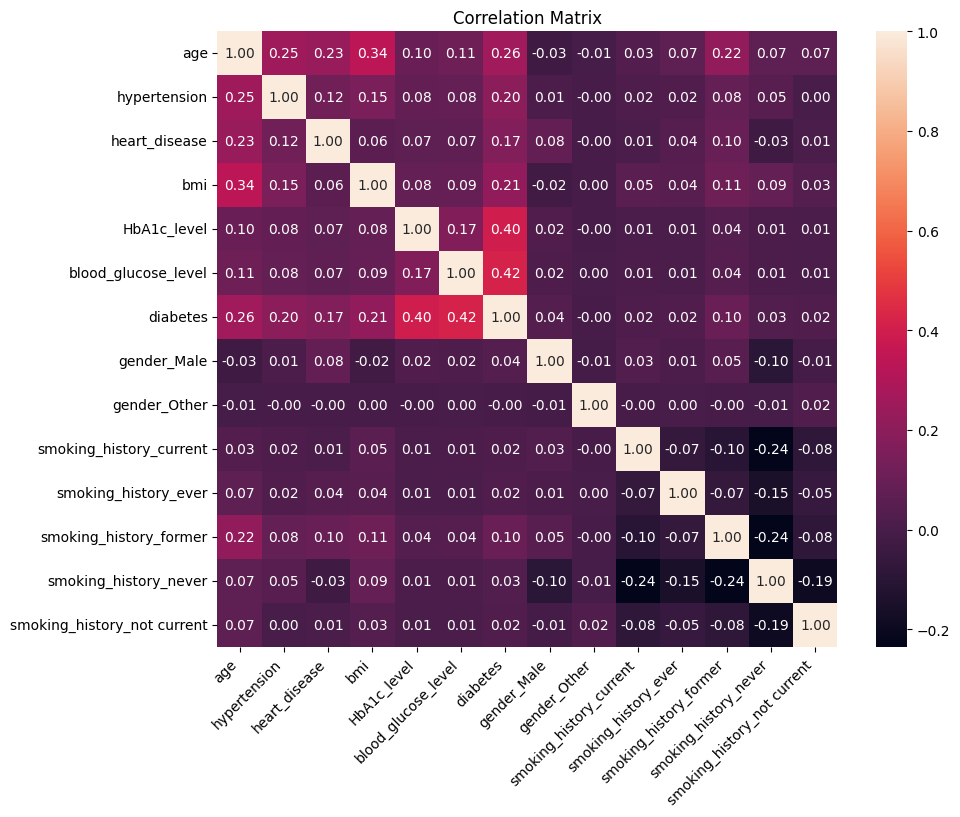

In [3]:
# Encode categorical variables to plot correlation
df_encoded = pd.get_dummies(df, drop_first=True) 
correlation_matrix = df_encoded.corr()

# Plot corr matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show plot
plt.show()

Correlation Coefficients:
- 1 indiciates a perfect positive correlation. 
- -1 indicates a perfect negative correlation.
- 0 indicates no correlation. 

Based on the correlation matrix, blood_glucose_level and HbA1c_level are strongly correlated to diabetes with correlation of 0.42 and 0.40 respectively. Age, hypertension, heart_diseases and bmi are moderately correlated with 0.17 to 0.26 correlation. Gender and smoking history have coefficients close to 0, indicating almost no correlation with diabetes, hence, are not strong predictors.

#### Data Processing and Feature Engineering

In [9]:
from scipy.stats import zscore

# Data cleaning for outliers using z-score
z_scores = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
df = df[~outliers]

# Encode categorical variables 
df["smoking_history"] = np.where(df["smoking_history"].str.contains("No Info", na=False),"never",
                        np.where(df["smoking_history"].str.contains("ever", na=False), "former",
                        np.where(df["smoking_history"].str.contains("not current", na=False), "former",
                        df["smoking_history"])))

df = pd.get_dummies(df, columns=['gender', 'smoking_history']).astype(int)
df


/tmp/ipykernel_30/941832464.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["smoking_history"] = np.where(df["smoking_history"].str.contains("No Info", na=False),"never",


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_current,smoking_history_former,smoking_history_never
0,80,0,1,25,6,140,0,1,0,0,0,1,0
1,54,0,0,27,6,80,0,1,0,0,0,0,1
2,28,0,0,27,5,158,0,0,1,0,0,1,0
3,36,0,0,23,5,155,0,1,0,0,1,0,0
4,76,1,1,20,4,155,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80,0,0,27,6,90,0,1,0,0,0,0,1
99996,2,0,0,17,6,100,0,1,0,0,0,0,1
99997,66,0,0,27,5,155,0,0,1,0,0,1,0
99998,24,0,0,35,4,100,0,1,0,0,0,1,0


#### Modelling

In this project, the use of ensemble models is explored.<br>
Ensemble modelling is a machine learning approach that combines multiple models using an ensemble strategy, forming one singular model.<br><br>
Ensemble Strategies include:
- Bagging: parallel process where each model is trained on bootstramp sample
- Boosting: sequential process where each model corrects the previous one's errors
- Stacking: parallel process where base models are trained simultaneously
- Blending: similar to stacking but with hold-out validation set <br>

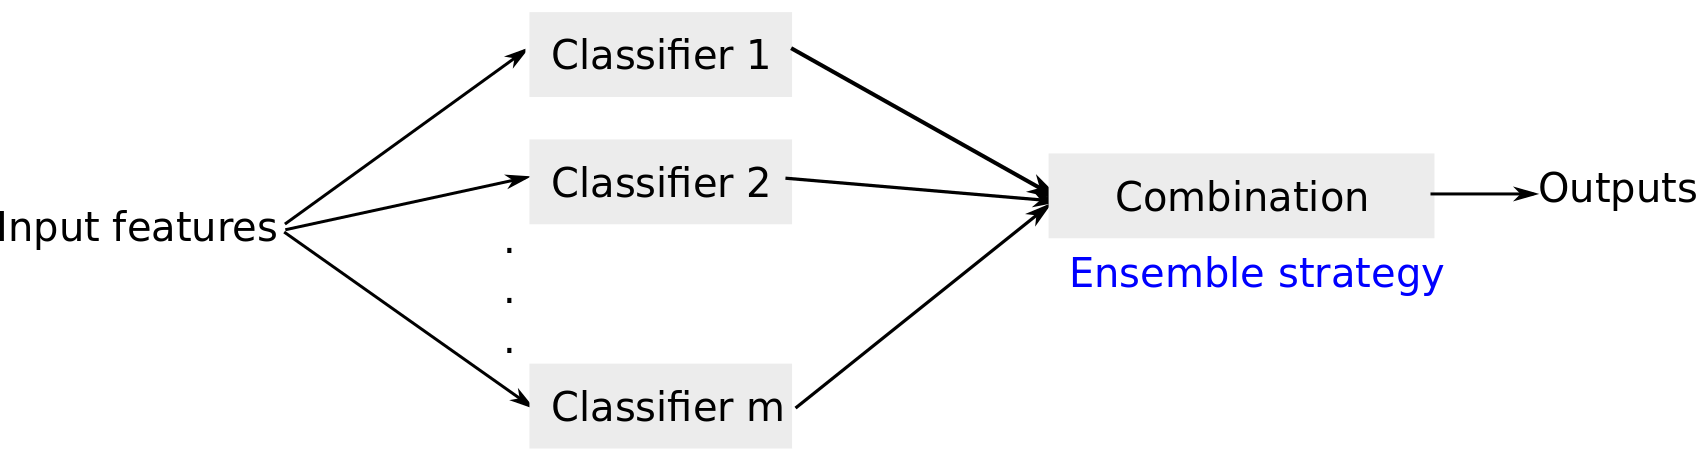<br>


Utilizing the stacking strategy, these individual classfiers will run on parallel and will be combined using **LightGBM as a meta model.**
1. Random Forest (RF)
2. Gradient Boost(GB)
3. XGBoost (Extreme Gradient Boosting)


The use of Optuna is also explored.
Optuna is a automatic hyperparameter optimization software framework avaialble on Python. It uses a combination of random search and Bayesian optimization. 
Thus, Optuna may sometimes be considered over GridSearchCV/RandomizedSearchCV for larger or more complex hyperparameter spaces. <br>
https://medium.com/@ethannabatchian/optimizing-random-forest-models-a-deep-dive-into-hyperparameter-tuning-with-optuna-b8e4fe7f3670



#### Balancing the dataset with SMOTE and ENN 

As oversampling using SMOTE may introduce synthetic instances which are not representative of the actual distribution, applying ENN with SMOTE helps to reduce noise to improve model performance, particularly recall. In this case, SMOTEENN and Tomek combined performed best in evaluation (due to its severe imbalance).
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/
